In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix
import pandas_ml as pdml
from sklearn.preprocessing import scale
import random

In [2]:
df = pd.read_csv(r"C:\Users\me\Desktop\creditcard.csv", low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,37447.0,-0.246325,1.158134,1.705843,2.764212,0.396696,0.655449,0.735939,-0.054254,-0.766311,...,-0.268357,-0.373114,-0.192910,-0.464028,-0.114836,0.154878,0.215349,-0.032483,28.90,0
1,147588.0,1.983510,-0.319980,-1.357466,0.778365,-0.083390,-0.265007,-0.377379,0.017422,1.458902,...,0.134051,0.765324,-0.041304,0.667513,0.214124,0.827917,-0.033246,-0.035080,17.43,0
2,81848.0,0.313873,-1.461292,0.704206,1.577461,-1.278759,0.307438,-0.149311,0.148710,0.879994,...,0.395521,0.349605,-0.419974,0.098208,0.251238,-0.270405,-0.000369,0.103576,426.42,0
3,125561.0,1.870509,-0.825092,0.167036,0.911041,-1.660387,-1.060285,-0.778376,-0.093335,-0.129802,...,-0.391560,-0.774384,0.508311,0.788792,-0.680279,-0.983992,0.064470,0.000169,74.00,0
4,150580.0,2.028442,0.582348,-2.467580,0.580551,0.805696,-1.287927,0.315242,-0.284833,0.161716,...,0.136400,0.597494,-0.108103,-0.530789,0.294810,-0.102680,0.020574,-0.004036,1.00,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


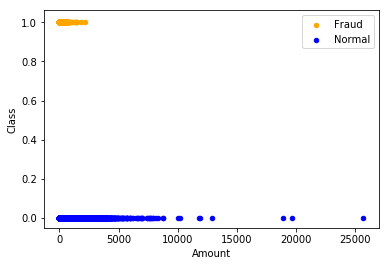

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [4]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

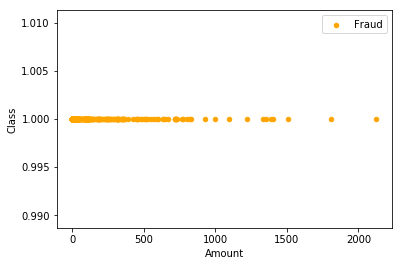

In [5]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()

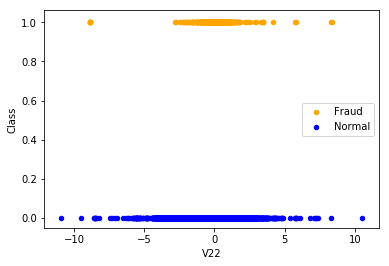

This feature may not be very important because of the similar distribution.


In [6]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression (Vanilla)

In [7]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 169 0.0016953743366471714
Number of frauds on y_train: 323 0.0017447764741470582


In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9989366291142923


In [14]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      99476    38    99514
True          68   101      169
__all__    99544   139    99683


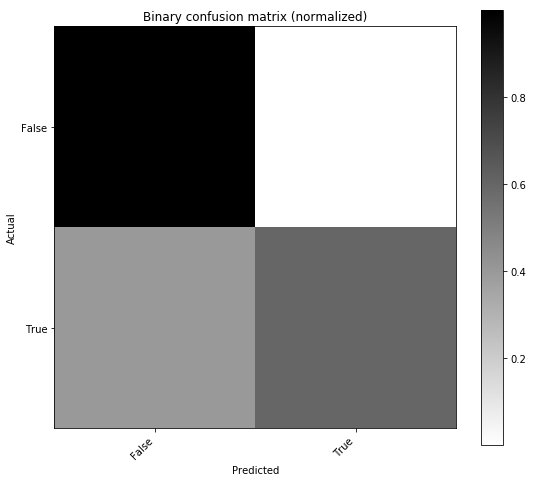

population: 99683
P: 169
N: 99514
PositiveTest: 139
NegativeTest: 99544
TP: 101
TN: 99476
FP: 38
FN: 68
TPR: 0.5976331360946746
TNR: 0.9996181441807183
PPV: 0.7266187050359713
NPV: 0.9993168849955798
FPR: 0.0003818558192817091
FDR: 0.2733812949640288
FNR: 0.40236686390532544
ACC: 0.9989366291142923
F1_score: 0.6558441558441559
MCC: 0.6584572579475577
informedness: 0.5972512802753929
markedness: 0.725935590031551
prevalence: 0.0016953743366471714
LRP: 1565.0753659296172
LRN: 0.4025205687268744
DOR: 3888.1873065015484
FOR: 0.000683115004420156


In [15]:
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [16]:
print("FNR is {0}".format(confusion_matrix.stats()['FNR']))

FNR is 0.40236686390532544


# Logistic Regression with SMOTE over sampling

In [17]:
df2 = pdml.ModelFrame(X_train, target=y_train)
sampler = df2.imbalance.over_sampling.SMOTE()
sampled = df2.fit_sample(sampler)
print("Size of training set after over sampling:", len(sampled))

Size of training set after over sampling: 369602


In [18]:
X_train_sampled = sampled.iloc[:,1:]
y_train_sampled = sampled['Class']

logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train_sampled, y_train_sampled)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.9844808041491528


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      97985  1529    99514
True          18   151      169
__all__    98003  1680    99683


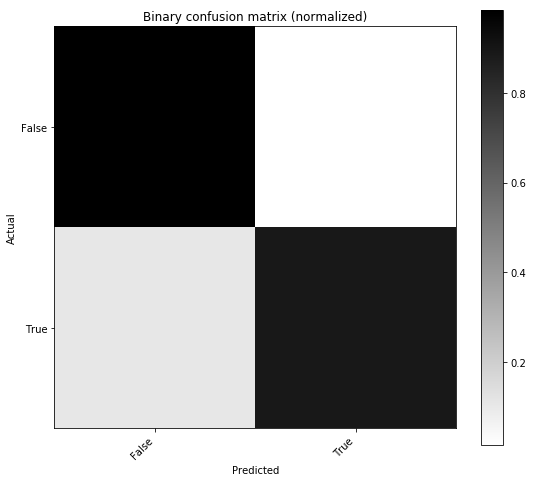

population: 99683
P: 169
N: 99514
PositiveTest: 1680
NegativeTest: 98003
TP: 151
TN: 97985
FP: 1529
FN: 18
TPR: 0.893491124260355
TNR: 0.984635327692586
PPV: 0.08988095238095238
NPV: 0.9998163321530974
FPR: 0.015364672307414033
FDR: 0.9101190476190476
FNR: 0.10650887573964497
ACC: 0.9844808041491528
F1_score: 0.16333153055705787
MCC: 0.28065202336291556
informedness: 0.878126451952941
markedness: 0.08969728453404979
prevalence: 0.0016953743366471714
LRP: 58.152305912128824
LRN: 0.10817088595555473
DOR: 537.596649952765
FOR: 0.00018366784690264585


In [19]:
y_predicted1 = np.array(logistic.predict(X_test))
y_right1 = np.array(y_test)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [20]:
print("FNR is {0}".format(confusion_matrix1.stats()['FNR']))

FNR is 0.10650887573964497
